In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import matplotlib.ticker as plticker
import os.path
import scipy as sc
from math import *

In [2]:
#setup plotter
%matplotlib inline
# matplotlib.verbose.level = 'debug-annoying'
sns.set_theme(style="darkgrid")
# sns.set(font_scale=1, rc={'figure.figsize' : (6.4, 4.8), 'text.usetex' : True, 'text.latex.preamble':r'\usepackage{siunitx}','savefig.bbox':'tight'})

In [3]:
# Jellium parameters 
r_s_K = 4.86
r_s_Na = 3.93

N=np.array([2,8,20,40])
r_s = np.array([r_s_Na,r_s_K])
rhoB=1 / (4 / 3 * np.pi * r_s**3)
Rc = np.zeros(len(rhoB)*len(N))
for i in range(len(rhoB)):
    for j in range(len(N)):
        Rc[i * len(N) + j] = (N[j] / (4 / 3 * np.pi * rhoB[i]))**(1/3)

# Q1

## Independent electron model

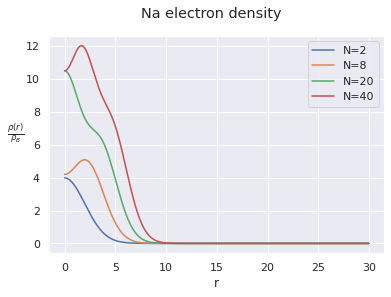

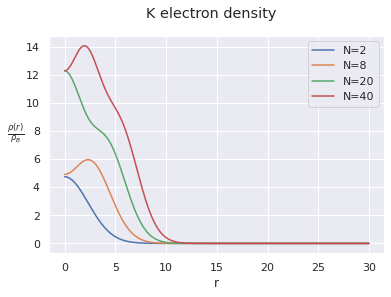

In [6]:
# plot rho for Na and K
elements = np.array(['Na','K'])
N = np.array([2,8,20,40])
names=['r','rho']
i=0
for ele in elements:
    plt.figure()
    for n in N:
        df = pd.read_csv("data/save/ind/numerov_{}_{}.dat".format(ele,n),sep='\s+',skiprows=1,names=names)
        plt.suptitle(r'{} electron density'.format(ele))
        plt.plot(df['r'], df['rho']/rhoB[i],label='N={}'.format(n))
        plt.xlabel('r')
        plt.ylabel(r'$\frac{\rho(r)}{\rho_B}$',rotation=0,labelpad=10)
        plt.legend()
    plt.savefig("output_data/density_{}_ind".format(ele))
    i = i + 1

# Q2

## Dependent electron model

In [ ]:
# plot rho
elements = np.array(['Na','K'])
N = np.array([8,20,40])
names=['r','rho','V_0','V_xc','U_r','V_ext']
i = 0
for ele in elements:
    plt.figure()
    for n in N:
        df_sc = pd.read_csv("data/save/dip/numerov_{}_{}.dat".format(ele,n),sep='\s+',skiprows=1,names=names)
        plt.suptitle(r'{} electron density'.format(ele))
        plt.plot(df_sc['r'], df_sc['rho']/rhoB[i],label='N={}'.format(n))
        plt.xlabel('r')
        plt.ylabel(r'$\frac{\rho(r)}{\rho_B}$',rotation=0,labelpad = 10)
        plt.legend()
    plt.savefig("output_data/density_{}_dip".format(ele))
    i = i+1
#     plt.ylim([0.7,0.8])

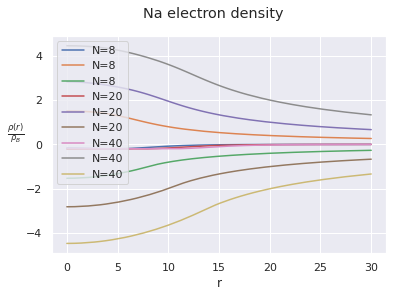

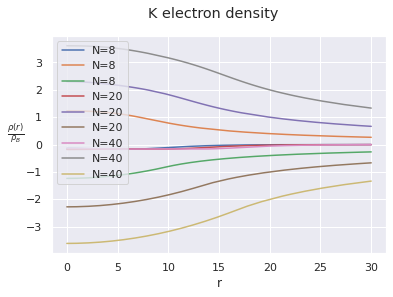

In [14]:
elements = np.array(['Na','K'])
N = np.array([8,20,40])
names=['r','rho','V_0','V_xc','U_r','V_ext']
i = 0
for ele in elements:
    plt.figure()
    for n in N:
        df_sc = pd.read_csv("data/save/dip/numerov_{}_{}.dat".format(ele,n),sep='\s+',skiprows=1,names=names)
        plt.suptitle(r'{} electron density'.format(ele))
        plt.plot(df_sc['r'], df_sc['V_xc'],label='N={}'.format(n))
        plt.plot(df_sc['r'], df_sc['U_r'],label='N={}'.format(n))
        plt.plot(df_sc['r'], df_sc['V_ext'],label='N={}'.format(n))
        plt.xlabel('r')
        plt.ylabel(r'$\frac{\rho(r)}{\rho_B}$',rotation=0,labelpad = 10)
        plt.legend()
    plt.savefig("output_data/density_{}_dip".format(ele))
    i = i+1

In [9]:
df_sc

,r,rho,V_0,V_xc,U_r,V_ext
0,0.0001,1.494260e-03,-0.144024,-0.144640,3.61051,-3.60990
1,0.0011,1.494260e-03,-0.144024,-0.144640,3.61051,-3.60990
2,0.0021,1.494260e-03,-0.144024,-0.144640,3.61051,-3.60990
3,0.0031,1.494260e-03,-0.144024,-0.144640,3.61051,-3.60990
4,0.0041,1.494260e-03,-0.144024,-0.144640,3.61051,-3.60990
...,...,...,...,...,...,...
29994,29.9941,6.467300e-14,-0.000675,-0.000076,1.33300,-1.33360
29995,29.9951,3.637410e-14,-0.000661,-0.000063,1.33295,-1.33355
29996,29.9961,1.616380e-14,-0.000647,-0.000048,1.33291,-1.33351
29997,29.9971,4.040180e-15,-0.000629,-0.000030,1.33286,-1.33346
